In [1]:
%cd /home/smalani/Cybernetic/growthcurvefit/
import pandas as pd

/home/smalani/Cybernetic/growthcurvefit


In [2]:
df = pd.read_csv('/home/smalani/Cybernetic/growthcurvefit/data/OptoQAMP1-PDC1-SGy128-4.csv')

In [3]:
import opto_fit_mu_baranyi_test as ofmb

reactor_arr = ['M0-1', 'M1-1', 'M2-1', 'M3-1', 'M4-1', 'M5-1', 'M6-1', 'M7-1',]
               #'M0-2', 'M1-2', 'M2-2', 'M3-2', 'M4-2', 'M5-2', 'M6-2', 'M7-2']
fixed_xmax = False
output = ofmb.mu_fit(df, reactor_arr, fixed_xmax=fixed_xmax)
print(output)

fitting mus
(array([0.08376551, 0.16738065, 0.24937108, 0.17425606, 0.38160858,
       0.42101639, 0.25650065, 0.26604158]), array([4.37431044e-01, 4.24264230e+00, 4.05562044e+00, 2.02479793e+00,
       1.00000000e-10, 8.35484211e-01, 1.00000000e-10, 2.25533222e-01]), array([ 8.52283903, 10.96453078,  9.40296165, 11.59772761, 14.06753076,
       12.19220414, 11.1752014 , 10.71816991]), array([0.99841843, 1.00024786, 0.99801996, 1.0000345 , 0.99961281,
       0.99534606, 0.99886393, 0.99918505]))


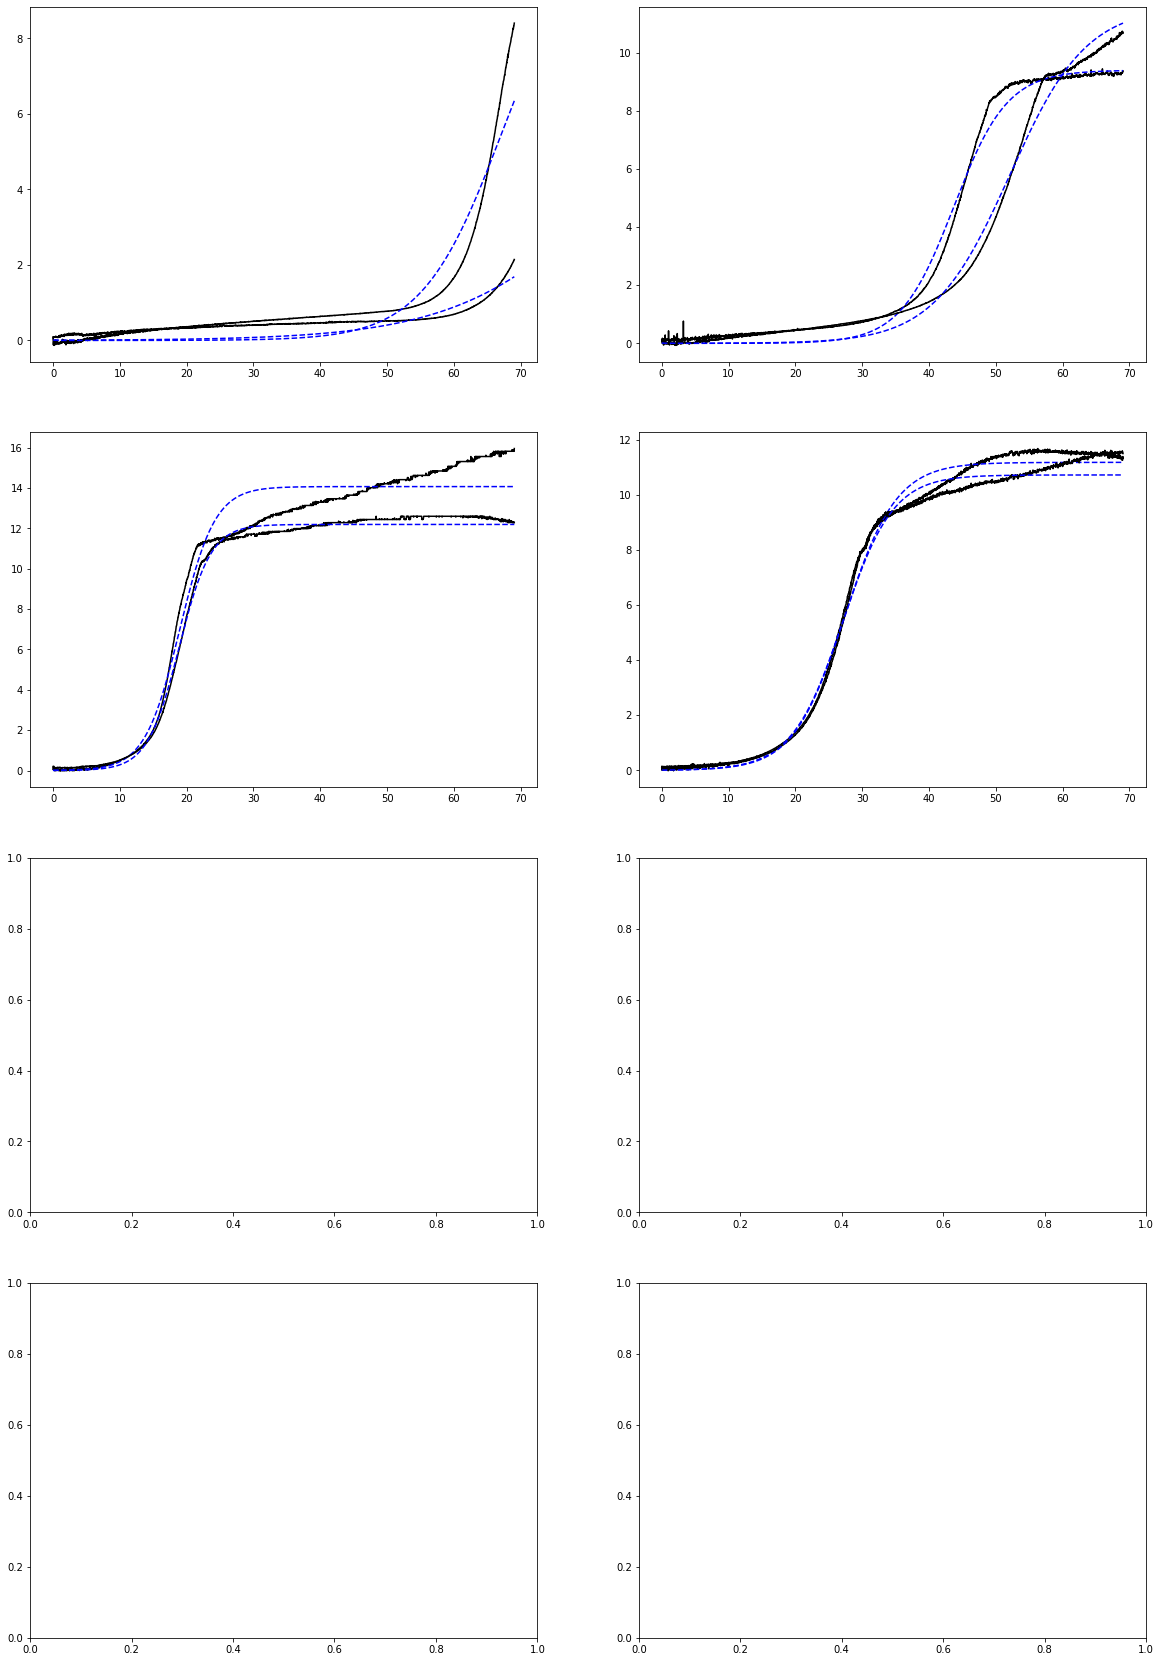

In [4]:
import matplotlib.pyplot as plt
import numpy as np

mu_SGy128_4_lights = np.array([0, 0, 0.01, 0.01, 0.1, 0.1, 1, 1, 0.03, 0.03, 0.01, 0.01, 0.06, 0.06, 0.08, 0.08])

fig, ax = plt.subplots(4, 2, figsize=(20,30))

mu_maxs = output[0]
lambdas = output[1]
xmaxs = output[2]
nus = output[3]
x0 = 0.01

error = 0
for i in range(len(lambdas)):
    lambd = lambdas[i]
    mu_max = mu_maxs[i]
    if fixed_xmax:
        xmax = xmaxs[0]
        nu = nus[0]
    else:
        xmax = xmaxs[i]
        nu = nus[i]
    t_arr = df['Time'].iloc[:df[reactor_arr[i]].size]
    x_t = ofmb.baranyifun(t_arr, [mu_max, x0, xmax, lambd, nu])
    ax[int(i/2)//2, int(i/2)%2].plot(df['Time'], df[reactor_arr[i]], 'k-', label=reactor_arr[i])
    ax[int(i/2)//2, int(i/2)%2].plot(t_arr, x_t, 'b--')